<a href="https://colab.research.google.com/github/annnnnnnnnnie/ICMachineLearningLab/blob/master/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Building a Machine Learning Pipeline


## Version history

| Date | Author | Description |
|:----:|:------:|:------------|
2021-01-12 | Josiah Wang | First version | 
2021-01-18 | Josiah Wang | Updated the description of the nearest neighbour classifier to make it clearer   |
2021-01-19 | Josiah Wang | Clarified the terms categories and classes, both referring to classification labels |

## Introduction

The aim of this lab exercise is to give you some practical experience in building a full machine learning pipeline in Python and NumPy.

By the end of this lab exercise, you will have constructed a full pipeline for a classification task: 
- reading and processing the dataset
- examining your data/features
- building a baseline classifier
- building a simple nearest neighbour classifier
- evaluating the performance of the classifier with the accuracy metric.


## Dataset

We will work with the Iris dataset in this lab exercise. This is a classic dataset from 1936 often used for teaching machine learning techniques.

Let's first download this dataset.

In [141]:
# Download iris data if it does not exist
# ! runs a bash command, so !ls will run the ls command on the virtual machine
import os

if not os.path.exists("iris.data"):
    !wget -O iris.data https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

### Examining the dataset

Now try to take a quick look at `iris.data`. The simple code snippet below will allow you to read from a file line by line. 

Note that we will use the terms *categories* and *classes* interchangably to mean classification labels. *Class* may also occasionally refer to the OOP sense of classes, which are different from classification labels.

Try to answer these questions while you examine the data:
- How many attributes/features are there?
- What kind of features are they? Categorical? Integers? Continuous real numbers?
- How many categories/classes are used in this dataset?
- How many instances are there in total?
- How many instances are there *per category*? (Is this a balanced dataset?)

In [142]:
# Examine the file to understand its structure
#for line in open("iris.data"):
#    print(line.strip())

# How many attributes.features are there? 
## 4 features
# What kind of features are they?
## Continuous real numbers
# How many classes?
## 3 classes
# How many instances?
## 150 instances
# Balanced?
## Yes

from collections import Counter

with open("iris.data") as dataset:
    first = []
    second = []
    third = []
    fourth = []
    label = []
    for line in dataset:
        line = line.strip().split(',')
        if line[0]:
            first.append(line[0])
            second.append(line[1])
            third.append(line[2])
            fourth.append(line[3])
            label.append(line[4])
    first.sort()
    second.sort()
    third.sort()
    fourth.sort()
    print(first)
    print(second)
    print(third)
    print(fourth)
    print(Counter(label))

['4.3', '4.4', '4.4', '4.4', '4.5', '4.6', '4.6', '4.6', '4.6', '4.7', '4.7', '4.8', '4.8', '4.8', '4.8', '4.8', '4.9', '4.9', '4.9', '4.9', '4.9', '4.9', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.1', '5.1', '5.1', '5.1', '5.1', '5.1', '5.1', '5.1', '5.1', '5.2', '5.2', '5.2', '5.2', '5.3', '5.4', '5.4', '5.4', '5.4', '5.4', '5.4', '5.5', '5.5', '5.5', '5.5', '5.5', '5.5', '5.5', '5.6', '5.6', '5.6', '5.6', '5.6', '5.6', '5.7', '5.7', '5.7', '5.7', '5.7', '5.7', '5.7', '5.7', '5.8', '5.8', '5.8', '5.8', '5.8', '5.8', '5.8', '5.9', '5.9', '5.9', '6.0', '6.0', '6.0', '6.0', '6.0', '6.0', '6.1', '6.1', '6.1', '6.1', '6.1', '6.1', '6.2', '6.2', '6.2', '6.2', '6.3', '6.3', '6.3', '6.3', '6.3', '6.3', '6.3', '6.3', '6.3', '6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6.4', '6.5', '6.5', '6.5', '6.5', '6.5', '6.6', '6.6', '6.7', '6.7', '6.7', '6.7', '6.7', '6.7', '6.7', '6.7', '6.8', '6.8', '6.8', '6.9', '6.9', '6.9', '6.9', '7.0', '7.1', '7.2', '7.2', '7.2', '7.3'

### Read and store the instances and labels

Now, we will try to properly read in the data and store them into the variables `x` and `y`.

Depending on your algorithm, you can sometimes just use the string labels directly as `y` (i.e. `Iris-setosa`, `Iris-versicolor`, `Iris-virginica`). It is, however, often converted to integers (`0`, `1`, `2`).

Complete the function `read_dataset()` below that takes in the filepath (a string), and returns a tuple containing the numpy arrays `x` and `y` and also the list of class labels. 

- `x` is a numpy array with shape `(N, K)`, where `N` is the number of examples and `K` the number of attributes/features.

- `y` is a numpy array with shape `(N, )`, where each element in the array is an integer from 0 to `C`, and `C` is the number of categories/classes.

- `classes` is a numpy array with shape `(C, )`, containing the label for each of the class (category).

Hint: For computing `y` from the string labels, use `np.unique()` with the keyword argument `return_inverse=True` to easily get the unique class labels and the mapping to the labels at the same time. Or you can also just write this from scratch in Python - I don't mind!


In [143]:
# Let's warm up with a little Python file reading exercise!
# Complete the function below to read the file and store the instances as 
# feature vectors x and labels y

import numpy as np

def read_dataset(filepath):
    """ Read in the dataset from the specified filepath

    Args:
        filepath (str): The filepath to the dataset file

    Returns:
        tuple: returns a tuple of (x, y, classes), each being a numpy array. 
               - x is a numpy array with shape (N, K), 
                   where N is the number of instances
                   K is the number of features/attributes
               - y is a numpy array with shape (N, ), and each element should be 
                   an integer from 0 to C-1 where C is the number of classes 
               - classes : a numpy array with shape (C, ), which contains the 
                   unique class labels corresponding to the integers in y
    """
    with open(filepath) as dataset:
        data = filter(lambda l: l[0], map(lambda l: l.strip().split(','), dataset))
        x_raw = []
        y_raw = []
        
        for line in data:
            x_raw.append(list(map(float, line[:-1])))
            y_raw.append(line[-1])
        
        classes, big_y = np.unique(np.array(y_raw), return_inverse=True)
        big_x = np.array(x_raw)
        
        return big_x, big_y, classes

We are expecting `N` to be 150. So if you happen to end up with 151, you will need to check why and update your code accordingly! (It likely has something to do with a blank line)

In [144]:
(x, y, classes) = read_dataset("iris.data")
print(x.shape)
print(y.shape)
print(classes)

(150, 4)
(150,)
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Understanding the features

Usually, I would also encourage you to examine the raw data itself (e.g. images of the flowers). This is so that you can gain insights into what might be useful to distinguish between the classes (colour? size?) Unfortunately, we are not provided with these, but only pre-processed features. So we can skip the explicit feature encoding step and just use the pre-processed features directly.

The dataset itself does not give you more information about the four features, but they actually represent the: 
1. sepal length (cm)
2. sepal width (cm)
3. petal length (cm)
4. petal width (cm)

Now, to gain a better understanding of the features, try to compute some statistics for each of them. For example,
- What is the minimum and maximum value for each feature?
- What is the mean, median and standard deviation for each?

It is also a good idea to obtain the statistics above separately for each class. So you can try to find each attribute's range, mean, median, and standard deviation separately for class 0, class 1 and class 2. You may discover some patterns and get some ideas about what features will be useful for certain classes. For example, perhaps you might notice that one of the features have a completely different range for class 0 vs class 2? 

Tip: `x[y==2]` gives you all the feature vectors belonging to class 2


In [145]:
# Free-style coding! Practice your NumPy skills here by computing some 
# statistics for the features

# Example: compute the min for each attribute
print(x.min(axis=0))
print(x.max(axis=0))
print()
for c in range(len(classes)):
    print(x[y==c].min(axis=0))
    print(x[y==c].max(axis=0))
    print(x[y==c].std(axis=0))
    print(x[y==c].mean(axis=0))
    print()

[4.3 2.  1.  0.1]
[7.9 4.4 6.9 2.5]

[4.3 2.3 1.  0.1]
[5.8 4.4 1.9 0.6]
[0.34894699 0.37719491 0.17176728 0.10613199]
[5.006 3.418 1.464 0.244]

[4.9 2.  3.  1. ]
[7.  3.4 5.1 1.8]
[0.51098337 0.31064449 0.46518813 0.19576517]
[5.936 2.77  4.26  1.326]

[4.9 2.2 4.5 1.4]
[7.9 3.8 6.9 2.5]
[0.62948868 0.31925538 0.54634787 0.27188968]
[6.588 2.974 5.552 2.026]



### Visualising the features

Now let's try to *really* understand the features by examining how they correlate. A very useful thing you can do is to visualise your features. This may give you better insights that you might have missed when looking at just the numbers. 

We will use an external Python library called `matplotlib` for plotting. If you are working locally on your computer, you may need to install the library with `pip3 install matplotlib`.

### Plotting a scatter plot for two features

Let us first try to examine whether the features are actually any good for classifying the flowers. Let's try to plot a scatter plot for the first two features (sepal length vs sepal width).

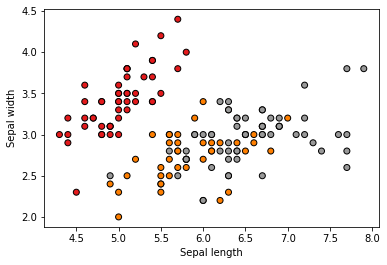

In [146]:
import matplotlib.pyplot as plt

feature_names = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
                        
plt.figure()
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

If you look carefully at the scatter plot above, you may find that with only these two features, you can actually already separate one of the classes (in red, this is actually "setosa") from the other two classes with a straight line (a linear classifier). So these kinds of observation will be useful to inform your machine learning design.

Now, let’s try visualising the remaining two features (petal length vs petal width).

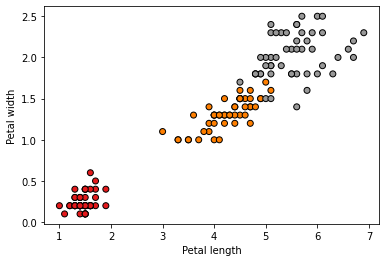

In [147]:
plt.figure()
plt.scatter(x[:,2], x[:,3], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.show()

Woah! You should see something even better! The first class (in red) forms its own tight cluster, while the other two are just about separable. So using just these two features might even be enough for our classifier!

Such visualisation activities can actually be very useful for you to decide on what features to use!

If you want, you can try further combinations/views, for example sepal width and petal width.

### Plotting histograms

While the statistics you computed earlier (min, max, median, etc.) might be useful, sometimes you can get more insights by **visualising** the value of the features itself.

So let's say we want to check the values of petal width (since it seems like a good feature), separately for the three classes. We can plot a histogram of the petal width distribution for each of the classes.

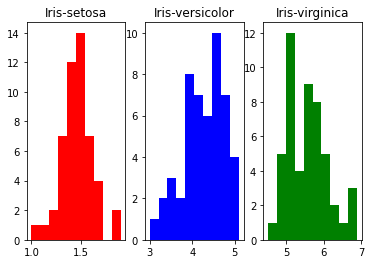

In [148]:
fig, ax = plt.subplots(1,3) # plot subfigures in a 1x3 grid

ax[0].hist(x[y==0, 2], color='r')
ax[0].set(title=classes[0])

ax[1].hist(x[y==1, 2], color='b')
ax[1].set(title=classes[1])

ax[2].hist(x[y==2, 2], color='g')
ax[2].set(title=classes[2])

plt.show()

You can see that "setosa" can clearly be distinguished from the other two classes by petal width. For "versicolor" and "virginica", there is a bit of an overlap when the petal width is between around 4.5-5.1. So there will be a bit of uncertainty here.

You can also use a Python library called [Pandas](https://pandas.pydata.org) to help with analysing your dataset and features. We won't cover this in this lab tutorial. 

## Pre-process your data

Now, remember that you will need a **test set** that is separate from the **training set**.

While some datasets provide pre-splitted training and test datasets, others do not. 

The Iris dataset has not been pre-splitted. So you will have to split this yourself.

So divide your dataset at random into training and testing.

Make sure that you do not end up with one class all being in the test set!

I used NumPy's `np.random` in the code below, but you are free to use Python's `random` if you prefer and modify accordingly.


In [149]:
from numpy.random import default_rng

def split_dataset(x, y, test_proportion, random_generator=default_rng()):
    """ Split dataset into training and test sets, according to the given 
        test set proportion.
    
    Args:
        x (np.ndarray): Instances, numpy array with shape (N,K)
        y (np.ndarray): Class labels, numpy array with shape (N,)
        test_proportion (float): the desired proportion of test examples 
                                 (0.0-1.0)
        random_generator (np.random.Generator): A random generator

    Returns:
        tuple: returns a tuple of (x_train, x_test, y_train, y_test) 
               - x_train (np.ndarray): Training instances shape (N_train, K)
               - x_test (np.ndarray): Test instances shape (N_test, K)
               - y_train (np.ndarray): Training labels, shape (N_train, )
               - y_test (np.ndarray): Test labels, shape (N_train, )
    """
    x_train = []
    y_train = []
    
    x_test = []
    y_test = []
    
    for i in range(len(x)):
        if random_generator.random() < test_proportion:
            x_test.append(x[i])
            y_test.append(y[i])
        else:
            x_train.append(x[i])
            y_train.append(y[i])
    return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)
    


And we'll now just split the dataset into 80% for training and 20% for testing.

Remember to initialise the random number generator with a seed number (just choose any number).

Tip: Random numbers are not really random in computers. They are **pseudo-random** because you can reproduce the same 'random' sequence with a fixed seed number. Using seed numbers is important in your scientific experiments so that you can reproduce your experimental results!

In [159]:
seed = 600123
rg = default_rng(seed)

x_train, x_test, y_train, y_test = split_dataset(x, y, 
                                                 test_proportion=0.2, 
                                                 random_generator=rg)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(set(y_train)) # Sanity check to ensure all labels are in the training set
print(set(y_test)) 

(121, 4)
(29, 4)
(121,)
(29,)
{0, 1, 2}
{0, 1, 2}


## Random Baseline Classifier

Now that the data is ready, we can finally construct your classifier.

We will always need to compare the performance of our dataset against something. So let us first construct a lower-bound, baseline classifier that predicts a class label at random.

We will create a class called `RandomClassifier`, which has two methods:
- `fit()` to train the classifier given the training examples `x` and their corresponding labels `y
- `predict()` to predict a set of labels given some examples `x`.

Obviously, there is no need to 'train' a random classifier. Instead, we only need to store the unique class labels that the classifier can use to make a random prediction.



In [160]:
class RandomClassifier:
    def __init__(self, random_generator=default_rng()):
        self.random_generator = random_generator
        self.unique_y = []
        self.counts = 0

    def fit(self, x, y):
        """ Fit the training data to the classifier.

        Args:
        x (np.ndarray): Instances, numpy array with shape (N,K)
        y (np.ndarray): Class labels, numpy array with shape (N,)
        """
        self.unique_y, self.counts = np.unique(y, return_counts=True)
        return

    def predict(self, x):
        """ Perform prediction given some examples.

        Args:
        x (np.ndarray): Instances, numpy array with shape (N,K)

        Returns:
        y (np.ndarray): Predicted class labels, numpy array with shape (N,)
        """        
        prediction = []
        table = np.repeat(self.unique_y, self.counts)
        for _ in x:
            prediction.append(table[self.random_generator.integers(len(table))])
        return np.array(prediction)



In [161]:
random_classifier = RandomClassifier(rg)
random_classifier.fit(x_train, y_train)
random_predictions = random_classifier.predict(x_test)
print(len(random_predictions))
print(len(y_test))
print(random_predictions)

29
29
[0 1 0 0 0 1 0 0 2 1 0 0 1 2 2 0 1 0 0 1 0 0 0 1 1 1 0 1 2]


## Evaluation

Now, let's try to evaluate our random classifier. Let's try to implement the accuracy metric as discussed in our lecture.

In [162]:
def compute_accuracy(y_gold, y_prediction):
    """ Compute the accuracy given the ground truth and predictions

    Args:
    y_gold (np.ndarray): the correct ground truth/gold standard labels
    y_prediction (np.ndarray): the predicted labels

    Returns:
    float : the accuracy
    """

    assert len(y_gold) == len(y_prediction)  
    
    correct_count = 0
    total = len(y_gold)
    for i in range(len(y_gold)):
        if y_gold[i] == y_prediction[i]:
            correct_count += 1
    
    return correct_count/total

In [163]:
accuracy = compute_accuracy(y_test, random_predictions)
print(accuracy)

0.3448275862068966


## Nearest Neighbour Classifier

Let's now try to construct a better classifier.

Let's build a classifier which takes the test examples, and for each predicts the class label of the nearest training example according to the Euclidean distance metric $d(x^{(i)}, x^{(q)})=\sqrt{\sum_f^F (x_f^{(i)} - x_f^{(q)})^2}$.

We will construct a class called `NearestNeighbourClassifier`. To make our framework reusable, this class will have the same methods as `RandomClassifier`: `fit()` and `predict()`.

Again, because this is a 'lazy learner', our focus will be on the `predict()` method. The `fit()` method will only need to store the instances and the corresponding labels.

In [164]:
class NearestNeighbourClassifier:
    def __init__(self):
        self.x = np.array([])
        self.y = np.array([])

    def fit(self, x, y):
        """ Fit the training data to the classifier.

        Args:
        x (np.ndarray): Instances, numpy array with shape (N,K)
        y (np.ndarray): Class labels, numpy array with shape (N,)
        """
        self.x = np.copy(x)
        self.y = np.copy(y)

    def predict(self, x):
        """ Perform prediction given some examples.

        Args:
        x (np.ndarray): Instances, numpy array with shape (N,K)

        Returns:
        y (np.ndarray): Predicted class labels, numpy array with shape (N,)
        """ 
        # TODO: Complete this method to predict the class of the 
        # nearest neighbour given a set of test instance
        prediction = []
        for one_entry in x:
            p = self.predict_one(one_entry)
            prediction.append(p)
        return np.array(prediction)
    
    
    def predict_one(self, x):
        current_min = float('inf')
        current_argmin = 0
        for i in range(len(self.x)):
            dist = NearestNeighbourClassifier.euclidean_distance(x, self.x[i])
            if dist < current_min:
                current_min = dist
                current_argmin = i
        return self.y[current_argmin]
    
    @staticmethod
    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum(np.square(x1-x2)))

In [165]:
nn_classifier = NearestNeighbourClassifier()
nn_classifier.fit(x_train, y_train)
nn_predictions = nn_classifier.predict(x_test)
print(nn_predictions)

[0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]


## Evaluation (again)

And let's evaluate our new nearest neighbour classifier. You should be able to achieve >90% accuracy. Not bad for such a simple classifier!

In [166]:
accuracy = compute_accuracy(y_test, nn_predictions)
print(accuracy)

0.9655172413793104


## Summary

And congratulations! You will have constructed a full pipeline for a classification task, and have built and evaluated your first classifier! 

I hope that this tutorial have given you a practical understanding of the pipeline at implementation level. I hope you have also gained an appreciation on why it is important to examine your data and features before embarking on any ML project. Hopefully you have also brushed up your Python+NumPy skills while you are at it!

We will be coming back to these experiments in later tutorials and construct more complex classifiers. Till then, happy learning!


## Bonus activity (Optional)

We concluded from our visualisations that perhaps you may only need the last two features (i.e. petal width and petal height) to construct our classifier. Let's test our intuition and see whether we can achieve a good enough accuracy with only the last two features.

In [167]:
x_sub_train = x_train[:,-2:] # TODO: Extract only the last two columns of x_train
x_sub_test = x_test[:,-2:] # TODO: Extract only the last two columns of x_test
print(x_sub_train.shape)
print(x_sub_test.shape)

nn_classifier = NearestNeighbourClassifier()
nn_classifier.fit(x_sub_train, y_train)
nn_predictions = nn_classifier.predict(x_sub_test)
print(nn_predictions)

accuracy = compute_accuracy(y_test, nn_predictions)
print(accuracy)


(121, 2)
(29, 2)
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
1.0


I actually achieved a similar accuracy as before. Two of the predictions changed - one from correct to incorrect, the other from incorrect to correct. You can perhaps examine these feature vectors to try to figure out why?